#          Business Case: Yulu - Hypothesis Testing 

## About Yulu 

Yulu is India’s leading `micro-mobility service provider`, which ***offers unique vehicles for the daily commute***. Starting off as a ***mission to eliminate traffic congestion in India***, Yulu provides the `safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting`. 

Yulu zones are located at all the appropriate locations (including ***metro stations, bus stands, office spaces, residential areas, corporate offices, etc***) to make those first and last miles smooth, affordable, and convenient! 

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want **to understand the factors affecting the demand for these shared electric cycles in the Indian market**. 

### importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind
from scipy.stats import chisquare
from scipy.stats import chi2

from scipy.stats import chi2_contingency
from scipy.stats import f_oneway # Numeric Vs categorical for many categories
from scipy.stats import shapiro # Test Gaussian (50 to 200 samples)
from scipy.stats import levene
from scipy.stats import kruskal
from scipy import stats
import statsmodels.api as sm
from scipy.stats import skew, kurtosis
import scipy.stats as spy

### Importing csv file

In [2]:
df=pd.read_csv('bike_sharing.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# 1. Define the Problem Statement, Import the required Libraries and perform Exploratory Data Analysis

**a. Examine dataset structure, characteristics, and statistical summary.**

In [3]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [4]:
df.shape

(10886, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


**b. Identify missing values and perform Imputation using an appropriate method.**

In [7]:
df.isnull()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,False,False,False,False,False,False,False,False,False,False,False,False
10882,False,False,False,False,False,False,False,False,False,False,False,False
10883,False,False,False,False,False,False,False,False,False,False,False,False
10884,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

**c. Identify and remove duplicate records.**

In [9]:
# Check for duplicates
duplicates = df[df.duplicated()]
duplicates

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


In [10]:
np.any(df.duplicated())

False

**d. Analyze the distribution of Numerical & Categorical variables, separately**

In [11]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [12]:
# Convert the 'datetime' column to datetime data type
df['datetime'] = pd.to_datetime(df['datetime'])

# Verify the conversion
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

### What is the time period for which the data is given ?

In [13]:
df['datetime'].min()

Timestamp('2011-01-01 00:00:00')

In [14]:
df['datetime'].max()

Timestamp('2012-12-19 23:00:00')

In [15]:
df['datetime'].max() - df['datetime'].min()

Timedelta('718 days 23:00:00')

In [16]:
df['day'] = df['datetime'].dt.day_name()

In [17]:
# Display the first few rows to verify the changes
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,Saturday


In [18]:
# setting the 'datetime' column as the index of the DataFrame 'df' 
df.set_index('datetime', inplace = True)

- By setting the 'datetime' column as the index, it allows for easier and more efficient access,filtering, and manipulation of the data based on the datetime values. 
- It enables operations such as resampling, slicing by specific time 
periods, and applying time-based calculations.

In [19]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,Saturday
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,Saturday
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,Saturday
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,Saturday
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,Saturday


# Slicing Data by Time

- The below code visualizes the trend of the monthly average values for the ***'casual', 'registered', and 'count' variables***, allowing for easy comparison and analysis of their patterns over time

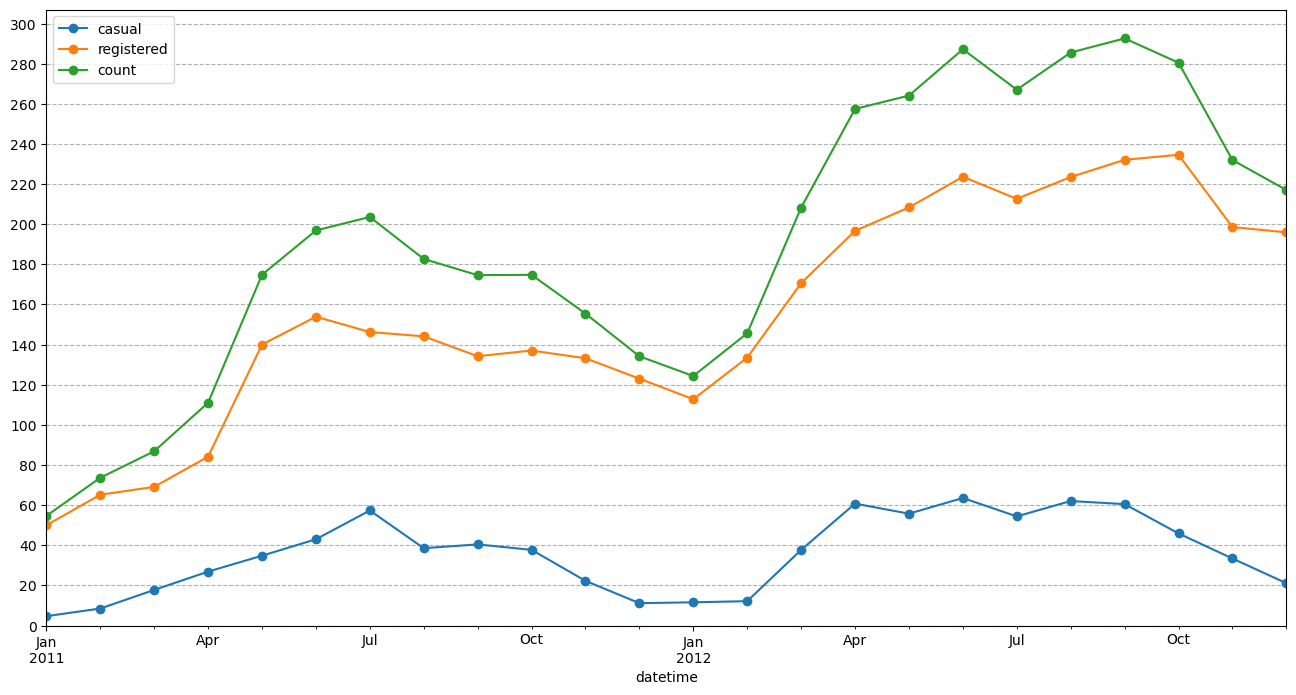

In [20]:
plt.figure(figsize = (16, 8))
# plotting a lineplot by resampling the data on a monthly basis, and calculating the mean value of 'casual', 'registered' and 'count' users for each month
df.resample('M')['casual'].mean().plot(kind = 'line', legend = 'casual', marker = 'o')
df.resample('M')['registered'].mean().plot(kind = 'line', legend = 'registered', marker = 'o')
df.resample('M')['count'].mean().plot(kind = 'line', legend = 'count',marker = 'o')
plt.grid(axis = 'y', linestyle = '--') # adding gridlines only along the y-axis
plt.yticks(np.arange(0, 301, 20))
plt.ylim(0,) # setting the lower y-axis limit to 0
plt.show() # displaying the plot

The total bike rentals (green line) `peak during summer months`, driven mainly by `registered users` (orange line). Casual users (blue line) have a `much lower and more stable` rental rate throughout the year.

##### I want to know if there is an increase in the average hourly count of rental bikes from the year 2011 to 2012

In [21]:
# resampling the DataFrame by the year 
df1 = df.resample('Y')['count'].mean().to_frame().reset_index()
# Create a new column 'prev_count' by shifting the 'count' column one position up to compare the previous year's count with the current year's count
df1['prev_count'] = df1['count'].shift(1)
# Calculating the growth percentage of 'count' with respect to the 'count' of previous year
df1['growth_percent'] = (df1['count'] - df1['prev_count']) * 100 /df1['prev_count']
df1

,datetime,count,prev_count,growth_percent
0,2011-12-31,144.223349,NaN,NaN
1,2012-12-31,238.560944,144.223349,65.410764


- This data suggests that there was substantial growth in the count of the variable over the course of one year.
- The mean total hourly count of rental bikes is ***144 for the year 2011 and 239 for the year 2012***. An annual growth rate of 65.41 % can be seen in the demand of electric vehicles on an hourly basis.

***It indicates positive growth and potentially a successful outcome or increasing demand for the variable being measured.***

In [22]:
df.reset_index(inplace = True)

### How does the average hourly count of rental bikes varies for different month ?

In [23]:
# Grouping the DataFrame by month
df1 = df.groupby(df['datetime'].dt.month)['count'].mean().reset_index()

# Renaming the 'datetime' column to 'month'
df1.rename(columns={'datetime': 'month', 'count': 'mean_count'}, inplace=True)

# Create a new column 'prev_count' by shifting the 'mean_count' column one position up
df1['prev_count'] = df1['mean_count'].shift(1)

# Calculating the growth percentage of 'mean_count' with respect to the 'prev_count'
df1['growth_percent'] = (df1['mean_count'] - df1['prev_count']) * 100 / df1['prev_count']

# Setting 'month' as the index
df1.set_index('month', inplace=True)

# Display the resulting DataFrame
df1

,mean_count,prev_count,growth_percent
month,,,
1,90.366516,NaN,NaN
2,110.003330,90.366516,21.730188
3,148.169811,110.003330,34.695751
4,184.160616,148.169811,24.290241
5,219.459430,184.160616,19.167406
6,242.031798,219.459430,10.285440
7,235.325658,242.031798,-2.770768
8,234.118421,235.325658,-0.513007
9,233.805281,234.118421,-0.133753


- The count of rental bikes shows an increasing trend from January to March, with a significant 
growth rate of 34.70% between February and March.
- The growth rate starts to stabilize from April to June, with a relatively smaller growth rate.
- From July to September, there is a slight decrease in the count of rental bikes, with negative 
growth rates.
- The count further declines from October to December, with the largest drop observed between 
October and November (-14.94%).

[]

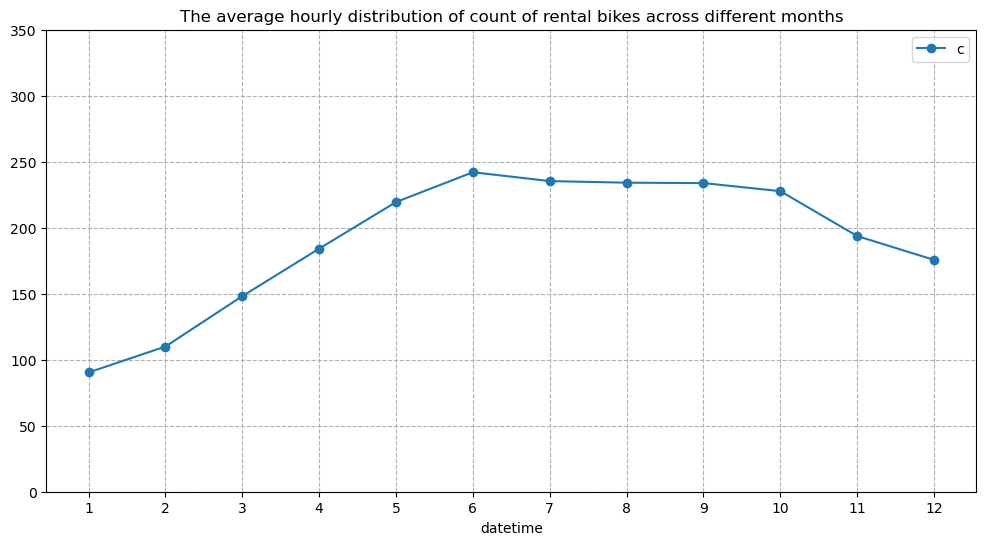

In [24]:
# The resulting plot visualizes the average hourly distribution of the count of rental bikes for each 
 # month, allowing for comparison and identification of any patterns or trends throughout the year.
# Setting the figure size for the plot
plt.figure(figsize = (12, 6))
# Setting the title for the plot
plt.title("The average hourly distribution of count of rental bikes across different months")
# Grouping the DataFrame by the month and calculating the mean of the 'count' column for each month. 
 # Ploting the line graph using markers ('o') to represent the average count per month.
df.groupby(by = df['datetime'].dt.month)['count'].mean().plot(kind ='line', marker = 'o')
plt.ylim(0,) # Setting the y-axis limits to start from zero
plt.xticks(np.arange(1, 13)) # Setting the x-ticks to represent the months from 1 to 12
plt.legend('count') # Adding a legend to the plot for the 'count' line.
plt.yticks(np.arange(0, 400, 50))
# Adding gridlines to both the x and y axes with a dashed line style
plt.grid(axis = 'both', linestyle = '--')
plt.plot() # Displaing the plot.

- The average hourly count of rental bikes is the highest in the month of June followed by July and 
August.
- The average hourly count of rental bikes is the lowest in the month of January followed by 
February and March.

***Overall, these trends suggest a seasonal pattern in the count of rental bikes, with higher 
demand during the spring and summer months, a slight decline in the fall, and a further 
decrease in the winter months. It could be useful for the rental bike company to consider 
these patterns for resource allocation, marketing strategies, and operational planning 
throughout the year.***

In [25]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,Saturday


### Basic Information about the Dataset

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  day         10886 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(8), object(1)
memory usage: 1.1+ MB


- The dataframe requires a memory usage of about 1.1+ MB.
- Though the memory usage is small but can we still decrease the memory usage ?

In [27]:
# 1: spring, 2: summer, 3: fall, 4: winter
def season_category(x):
 if x == 1:
     return 'spring'
 elif x == 2:
     return 'summer'
 elif x == 3:
     return 'fall'
 else:
     return 'winter'
df['season'] = df['season'].apply(season_category)

In [28]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16,Saturday
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40,Saturday
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32,Saturday
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0,3,10,13,Saturday
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0,0,1,1,Saturday


### Optimizing Memory Usage of the Dataframe

#### Updating dtype of season column

In [29]:
print('Memory usage of season column : ', df['season'].memory_usage())
# Since the dtype of season column is object, we can convert the dtype to category to save memory
df['season'] = df['season'].astype('category')
print('Updated Memory usage of season column : ',df['season'].memory_usage())

Memory usage of season column :  87216
Updated Memory usage of season column :  11218


#### Updating dtype of holiday column

In [30]:
# Ensure the 'holiday' column is of int type (if not already)
df['holiday'] = df['holiday'].astype(int)

# Check the max value in 'holiday' column
print('Max value entry in holiday column (before conversion): ', df['holiday'].max())

# Memory usage before conversion
print('Memory usage of holiday column (before conversion): ', df['holiday'].memory_usage())

# Convert 'holiday' column to a categorical type
df['holiday'] = df['holiday'].astype('category')

# To get the max value, convert it to an ordered categorical type
df['holiday'] = df['holiday'].cat.as_ordered()

# Now check the max value in 'holiday' column
print('Max value entry in holiday column (after conversion to ordered): ', df['holiday'].max())

# Memory usage after conversion
print('Memory usage of holiday column (after conversion): ', df['holiday'].memory_usage())

Max value entry in holiday column (before conversion):  1
Memory usage of holiday column (before conversion):  43672
Max value entry in holiday column (after conversion to ordered):  1
Memory usage of holiday column (after conversion):  11138


#### Updating dtype of workingday column

In [31]:
# Check the max value in 'workingday' column
print('Max value entry in workingday column: ', df['workingday'].max())

# Memory usage before conversion
print('Memory usage of workingday column (before conversion): ', df['workingday'].memory_usage())

# Convert 'workingday' column to a categorical type
df['workingday'] = df['workingday'].astype('category')

# Memory usage after conversion
print('Updated memory usage of workingday column (after conversion): ', df['workingday'].memory_usage())

Max value entry in workingday column:  1
Memory usage of workingday column (before conversion):  87216
Updated memory usage of workingday column (after conversion):  11138


#### Updating dtype of weather column

In [32]:
# Check the max value in 'weather' column
print('Max value entry in weather column: ', df['weather'].max())

# Memory usage before conversion
print('Memory usage of weather column (before conversion): ', df['weather'].memory_usage())

# Convert 'weather' column to a categorical type
df['weather'] = df['weather'].astype('category')

# Memory usage after conversion
print('Updated memory usage of weather column (after conversion): ', df['weather'].memory_usage())

Max value entry in weather column:  4
Memory usage of weather column (before conversion):  87216
Updated memory usage of weather column (after conversion):  11218


#### Updating dtype of temp column

In [33]:
# Check the max value in 'temp' column
print('Max value entry in temp column: ', df['temp'].max())

# Memory usage before conversion
print('Memory usage of temp column (before conversion): ', df['temp'].memory_usage())

# Convert 'temp' column to float32 type
df['temp'] = df['temp'].astype('float32')

# Memory usage after conversion
print('Updated memory usage of temp column (after conversion): ', df['temp'].memory_usage())

Max value entry in temp column:  41.0
Memory usage of temp column (before conversion):  87216
Updated memory usage of temp column (after conversion):  43672


In [34]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16,Saturday
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40,Saturday
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32,Saturday
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0,3,10,13,Saturday
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0,0,1,1,Saturday


#### Updating dtype of atemp column

In [35]:
# Check the max value in 'atemp' column
print('Max value entry in atemp column: ', df['atemp'].max())

# Memory usage before conversion
print('Memory usage of atemp column (before conversion): ', df['atemp'].memory_usage())

# Convert 'atemp' column to float32 type
df['atemp'] = df['atemp'].astype('float32')

# Memory usage after conversion
print('Updated memory usage of atemp column (after conversion): ', df['atemp'].memory_usage())

Max value entry in atemp column:  45.455
Memory usage of atemp column (before conversion):  87216
Updated memory usage of atemp column (after conversion):  43672


In [36]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16,Saturday
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40,Saturday
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32,Saturday
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0,3,10,13,Saturday
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0,0,1,1,Saturday


#### Updating dtype of humidity column

In [37]:
# Check the max value in 'humidity' column
print('Max value entry in humidity column: ', df['humidity'].max())

# Memory usage before conversion
print('Memory usage of humidity column (before conversion): ', df['humidity'].memory_usage())

# Convert 'humidity' column to int8 type
df['humidity'] = df['humidity'].astype('int8')

# Memory usage after conversion
print('Updated memory usage of humidity column (after conversion): ', df['humidity'].memory_usage())

Max value entry in humidity column:  100
Memory usage of humidity column (before conversion):  87216
Updated memory usage of humidity column (after conversion):  11014


In [38]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16,Saturday
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40,Saturday
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32,Saturday
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0,3,10,13,Saturday
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0,0,1,1,Saturday


#### Updating dtype of windspeed column

In [39]:
# Check the max value in 'windspeed' column
print('Max value entry in windspeed column: ', df['windspeed'].max())

# Memory usage before conversion
print('Memory usage of windspeed column (before conversion): ', df['windspeed'].memory_usage())

# Convert 'windspeed' column to float32 type
df['windspeed'] = df['windspeed'].astype('float32')

# Memory usage after conversion
print('Updated memory usage of windspeed column (after conversion): ', df['windspeed'].memory_usage())

Max value entry in windspeed column:  56.9969
Memory usage of windspeed column (before conversion):  87216
Updated memory usage of windspeed column (after conversion):  43672


#### Updating dtype of casual column

In [40]:
# Check the max value in 'casual' column
print('Max value entry in casual column: ', df['casual'].max())

# Memory usage before conversion
print('Memory usage of casual column (before conversion): ', df['casual'].memory_usage())

# Convert 'casual' column to int16 type
df['casual'] = df['casual'].astype('int16')

# Memory usage after conversion
print('Updated memory usage of casual column (after conversion): ', df['casual'].memory_usage())

Max value entry in casual column:  367
Memory usage of casual column (before conversion):  87216
Updated memory usage of casual column (after conversion):  21900


#### Updating dtype of registered column

In [41]:
# Check the max value in 'registered' column
print('Max value entry in registered column: ', df['registered'].max())

# Memory usage before conversion
print('Memory usage of registered column (before conversion): ', df['registered'].memory_usage())

# Convert 'registered' column to int16 type
df['registered'] = df['registered'].astype('int16')

# Memory usage after conversion
print('Updated memory usage of registered column (after conversion): ', df['registered'].memory_usage())

Max value entry in registered column:  886
Memory usage of registered column (before conversion):  87216
Updated memory usage of registered column (after conversion):  21900


#### Updating dtype of count column

In [42]:
# Check the max value in 'count' column
print('Max value entry in count column: ', df['count'].max())

# Memory usage before conversion
print('Memory usage of count column (before conversion): ', df['count'].memory_usage())

# Convert 'count' column to int16 type
df['count'] = df['count'].astype('int16')

# Memory usage after conversion
print('Updated memory usage of count column (after conversion): ', df['count'].memory_usage())

Max value entry in count column:  977
Memory usage of count column (before conversion):  87216
Updated memory usage of count column (after conversion):  21900


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float32       
 6   atemp       10886 non-null  float32       
 7   humidity    10886 non-null  int8          
 8   windspeed   10886 non-null  float32       
 9   casual      10886 non-null  int16         
 10  registered  10886 non-null  int16         
 11  count       10886 non-null  int16         
 12  day         10886 non-null  object        
dtypes: category(4), datetime64[ns](1), float32(3), int16(3), int8(1), object(1)
memory usage: 415.4+ KB


#### Earlier the dataset was using 1.1+ MB of memory but now it has been reduced to 415.2+ KB. Around 63.17 % reduction in the memory usage.

### Basic Description of the dataset

In [44]:
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.230619,23.655096,61.886460,12.799149,36.021955,155.552177,191.574132
std,7.791600,8.474654,19.245033,8.164592,49.960477,151.039033,181.144454
min,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.940000,16.665001,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.500000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.240000,31.059999,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.000000,45.455002,100.000000,56.996899,367.000000,886.000000,977.000000


- These statistics provide insights into the central tendency, spread, and range of the numerical features in the dataset.

**Numerical columns are 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'**

In [45]:
numerical_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

In [46]:
# Print the numerical columns and their summary statistics
df[numerical_columns].describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.230619,23.655096,61.886460,12.799149,36.021955,155.552177,191.574132
std,7.791600,8.474654,19.245033,8.164592,49.960477,151.039033,181.144454
min,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.940000,16.665001,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.500000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.240000,31.059999,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.000000,45.455002,100.000000,56.996899,367.000000,886.000000,977.000000


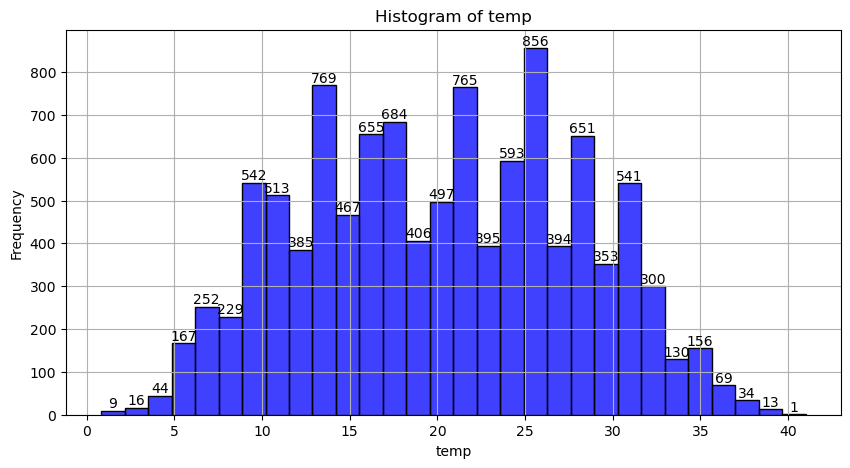

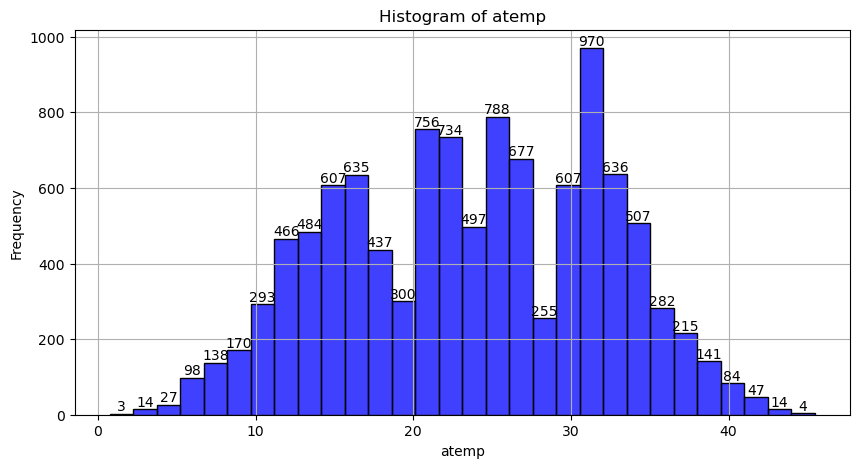

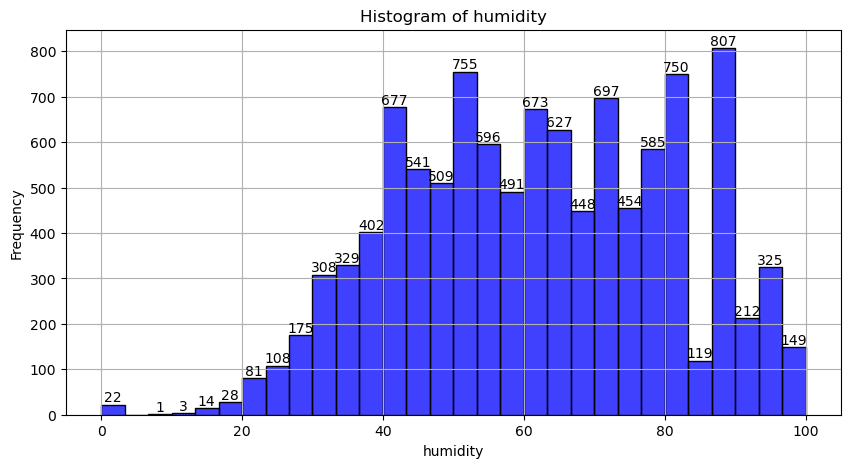

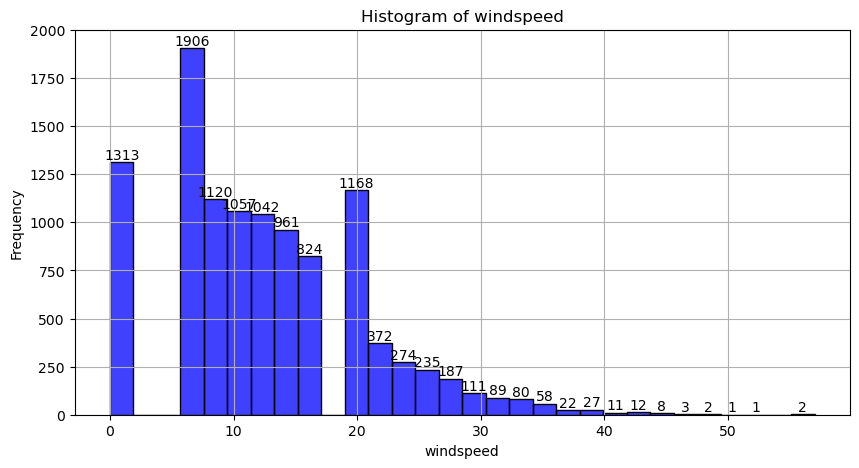

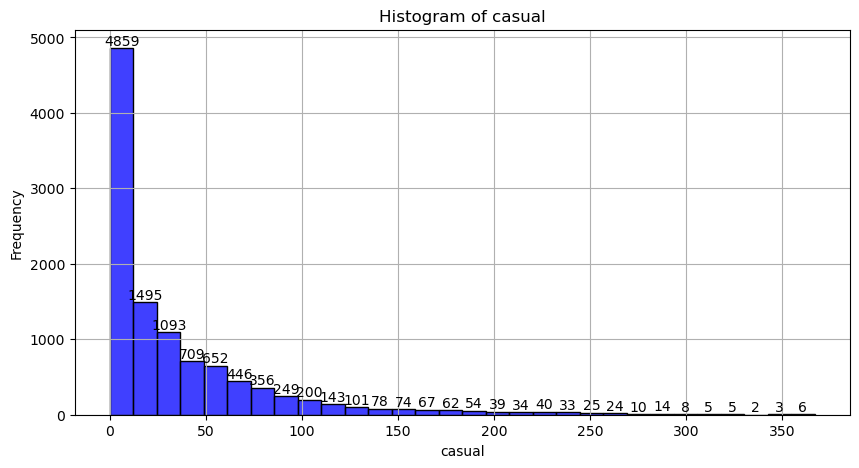

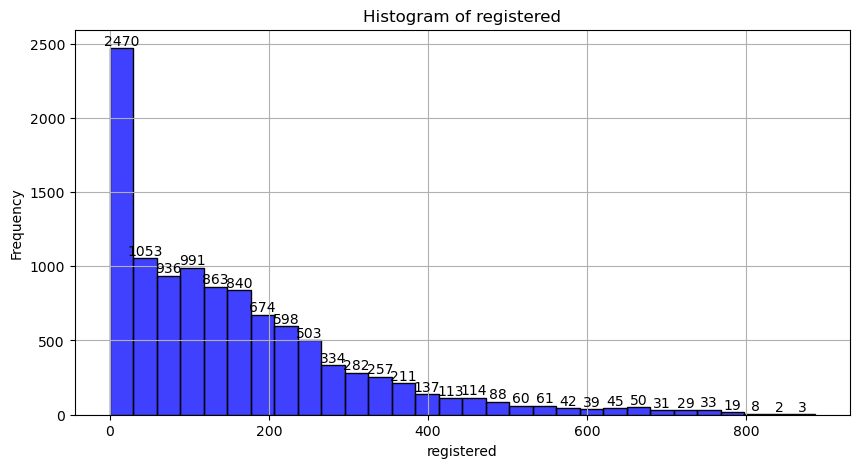

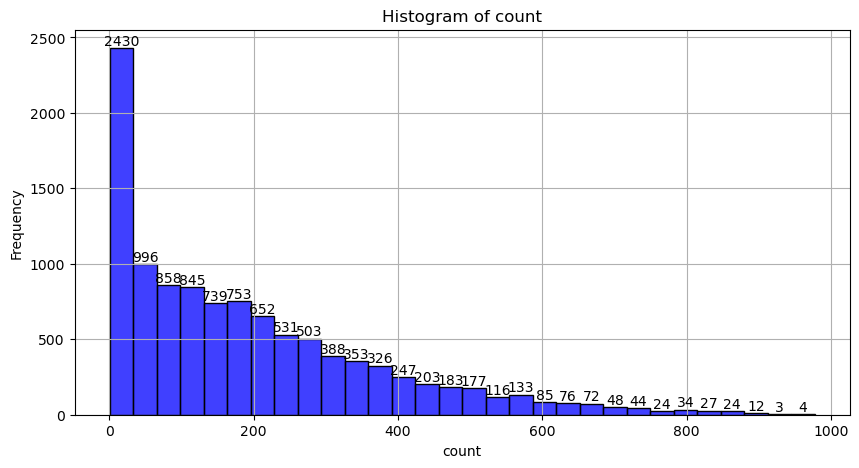

In [47]:
# Plot histograms
for col in numerical_columns:
    plt.figure(figsize=(10,5))
    sns.histplot(df[col], kde=False, bins=30, color='blue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    
    # Add values on top of the columns
    heights, _ = np.histogram(df[col], bins=30)
    for i in range(len(heights)):
        if heights[i] != 0:
            plt.text((_[i] + _[i+1]) / 2, heights[i], str(heights[i]), ha='center', va='bottom')
    
    plt.show()


**Categorical columns are 'season', 'holiday', 'workingday', 'weather'**

In [48]:
# Define categorical columns
categorical_columns = ['season', 'holiday', 'workingday', 'weather']

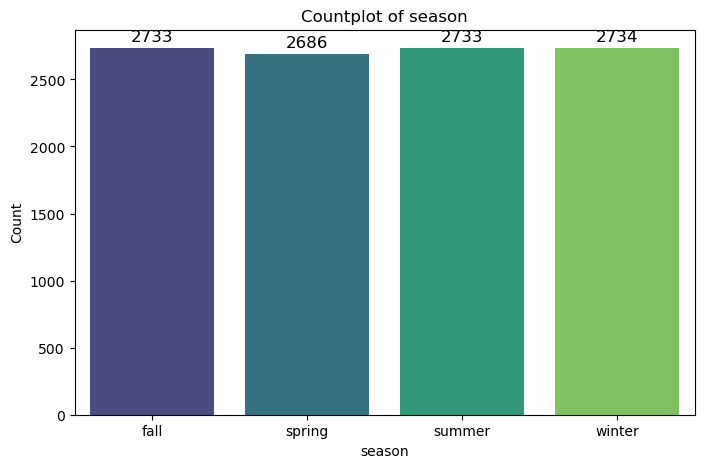

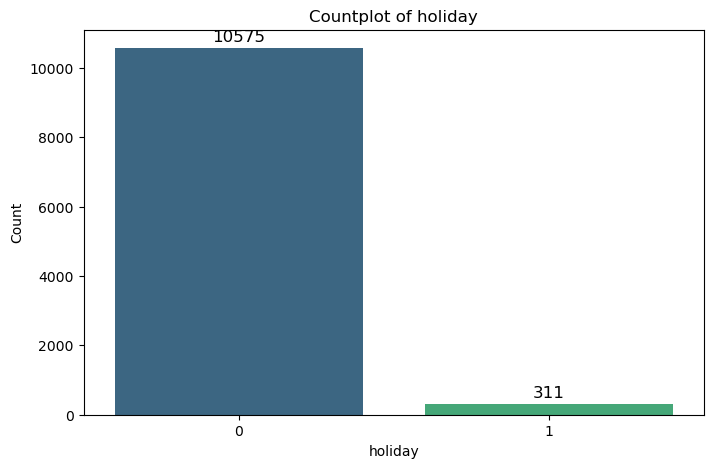

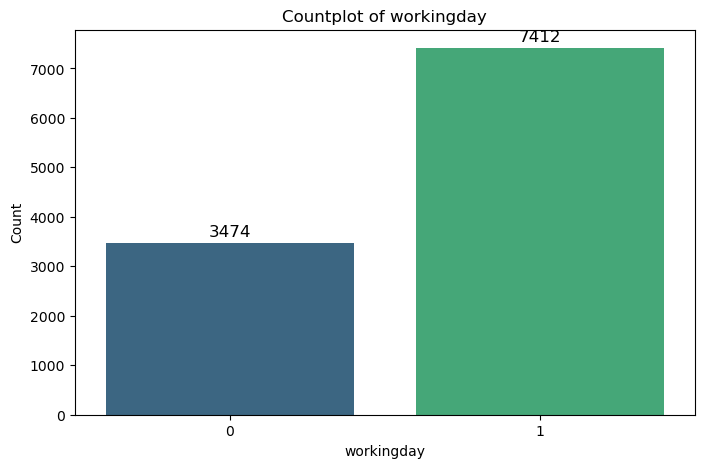

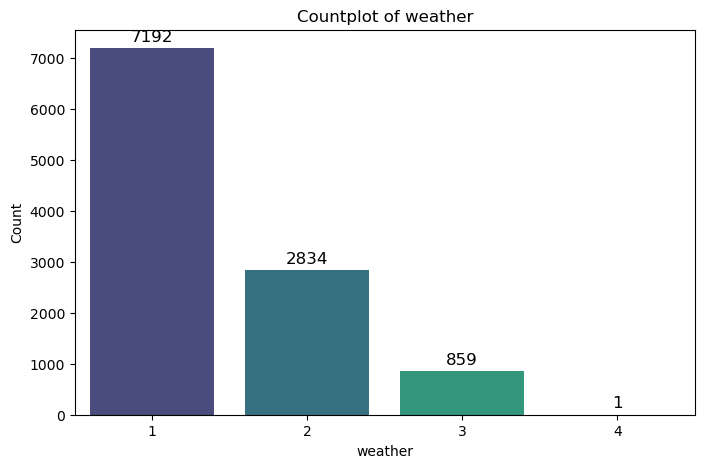

In [49]:
# Plot countplots for categorical columns with values on top of the bars
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    
    # Add count values on top of the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                    textcoords='offset points')
    
    plt.show()
    

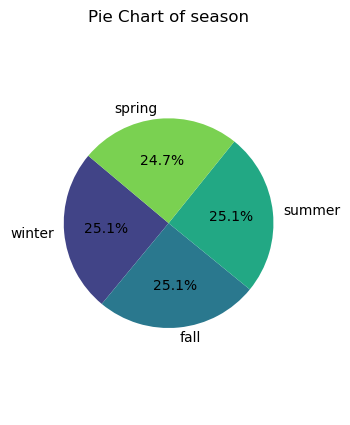

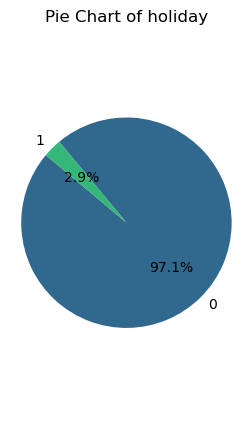

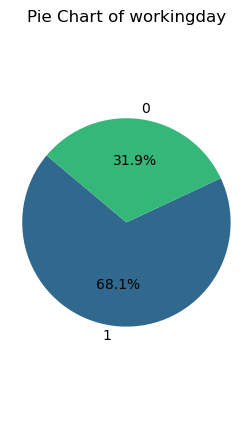

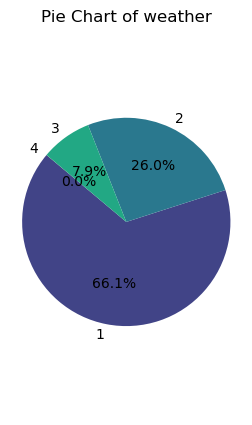

In [50]:

# Plot pie charts for categorical columns
for col in categorical_columns:
    plt.figure(figsize=(3, 5))
    counts = df[col].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(counts)))
    plt.title(f'Pie Chart of {col}')
    plt.axis('equal')
    plt.show()
    

e. Check for Outliers and deal with them accordingly.

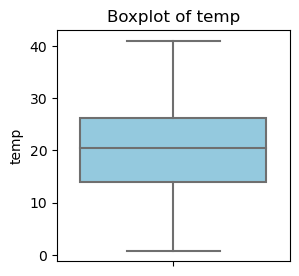

Outliers in temp:
 Empty DataFrame
Columns: [temp]
Index: []


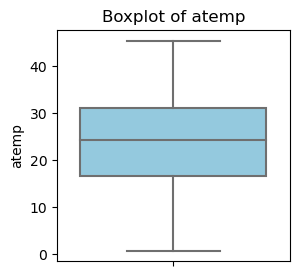

Outliers in atemp:
 Empty DataFrame
Columns: [atemp]
Index: []


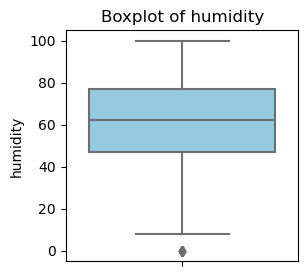

Outliers in humidity:
       humidity
1091         0
1092         0
1093         0
1094         0
1095         0
1096         0
1097         0
1098         0
1099         0
1100         0
1101         0
1102         0
1103         0
1104         0
1105         0
1106         0
1107         0
1108         0
1109         0
1110         0
1111         0
1112         0


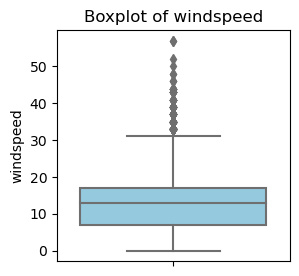

Outliers in windspeed:
        windspeed
175    32.997501
178    36.997398
194    35.000801
196    35.000801
265    39.000702
...          ...
10013  32.997501
10154  32.997501
10263  43.000599
10540  32.997501
10853  32.997501

[227 rows x 1 columns]


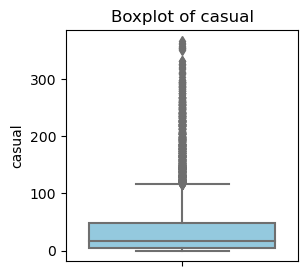

Outliers in casual:
        casual
1173      144
1174      149
1175      124
1311      126
1312      174
...       ...
10610     122
10611     148
10612     164
10613     167
10614     139

[749 rows x 1 columns]


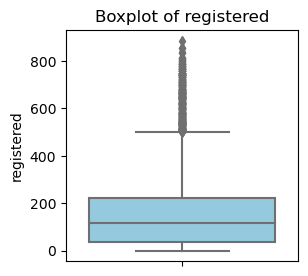

Outliers in registered:
        registered
1987          539
2011          532
2059          540
2179          521
2371          516
...           ...
10855         533
10856         512
10870         665
10879         536
10880         546

[423 rows x 1 columns]


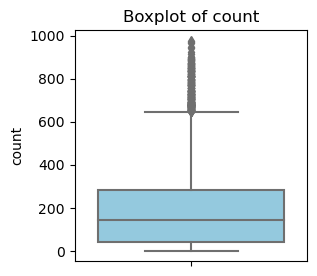

Outliers in count:
        count
6611     712
6634     676
6635     734
6649     662
6658     782
...      ...
10678    724
10702    688
10726    679
10846    662
10870    678

[300 rows x 1 columns]


In [51]:
# Numerical columns to check for outliers
numerical_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

# Function to detect outliers
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Plotting boxplots to visualize outliers and printing the outliers
for col in numerical_columns:
    plt.figure(figsize=(3,3))
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.show()
    
    outliers = find_outliers(df, col)
    print(f'Outliers in {col}:\n', outliers[[col]])

In [52]:
# Function to clip outliers
def clip_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

# Apply the function to all numerical columns
df_clipped = df.copy()
for col in numerical_columns:
    df_clipped = clip_outliers(df_clipped, col)

# Display the clipped dataset info
df_clipped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float32       
 6   atemp       10886 non-null  float32       
 7   humidity    10886 non-null  float64       
 8   windspeed   10886 non-null  float32       
 9   casual      10886 non-null  float64       
 10  registered  10886 non-null  float64       
 11  count       10886 non-null  float64       
 12  day         10886 non-null  object        
dtypes: category(4), datetime64[ns](1), float32(3), float64(4), object(1)
memory usage: 681.1+ KB


In [53]:
df_clipped.shape

(10886, 13)

- Again checking for out liers

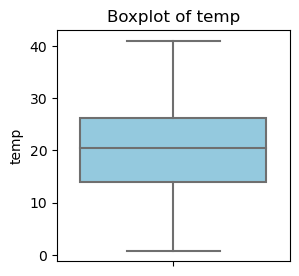

Outliers in temp:
 Empty DataFrame
Columns: [temp]
Index: []


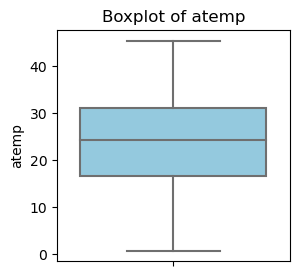

Outliers in atemp:
 Empty DataFrame
Columns: [atemp]
Index: []


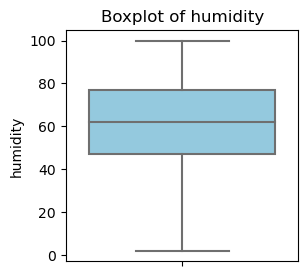

Outliers in humidity:
       humidity
1091       2.0
1092       2.0
1093       2.0
1094       2.0
1095       2.0
1096       2.0
1097       2.0
1098       2.0
1099       2.0
1100       2.0
1101       2.0
1102       2.0
1103       2.0
1104       2.0
1105       2.0
1106       2.0
1107       2.0
1108       2.0
1109       2.0
1110       2.0
1111       2.0
1112       2.0


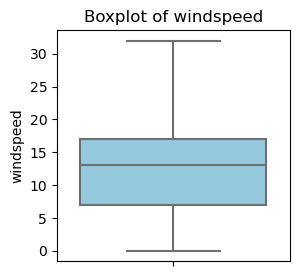

Outliers in windspeed:
        windspeed
175      31.9925
178      31.9925
194      31.9925
196      31.9925
265      31.9925
...          ...
10013    31.9925
10154    31.9925
10263    31.9925
10540    31.9925
10853    31.9925

[227 rows x 1 columns]


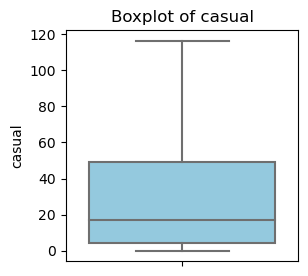

Outliers in casual:
        casual
1173    116.5
1174    116.5
1175    116.5
1311    116.5
1312    116.5
...       ...
10610   116.5
10611   116.5
10612   116.5
10613   116.5
10614   116.5

[749 rows x 1 columns]


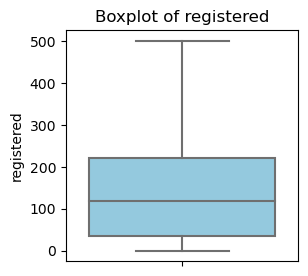

Outliers in registered:
        registered
1987        501.0
2011        501.0
2059        501.0
2179        501.0
2371        501.0
...           ...
10855       501.0
10856       501.0
10870       501.0
10879       501.0
10880       501.0

[423 rows x 1 columns]


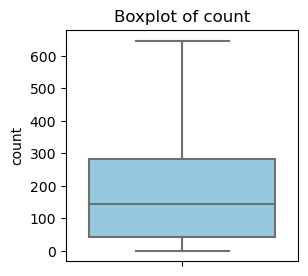

Outliers in count:
        count
6611   647.0
6634   647.0
6635   647.0
6649   647.0
6658   647.0
...      ...
10678  647.0
10702  647.0
10726  647.0
10846  647.0
10870  647.0

[300 rows x 1 columns]


In [54]:
# Function to detect outliers
def find_outliers(df_clipped, column):
    Q1 = df_clipped[column].quantile(0.25)
    Q3 = df_clipped[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_clipped[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Plotting boxplots to visualize outliers and printing the outliers
for col in numerical_columns:
    plt.figure(figsize=(3,3))
    sns.boxplot(y=df_clipped[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.show()
    
    outliers = find_outliers(df_clipped, col)
    print(f'Outliers in {col}:\n', outliers[[col]])

# 2. Try establishing a Relationship between the Dependent and Independent Variables.

- i. Plot a Correlation Heatmap and draw insights.

In [55]:
# Compute the correlation matrix
correlation_matrix = df_clipped.corr().abs()

correlation_matrix

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,0.065107,0.015521,0.542221,0.330598,0.399567
atemp,0.984948,1.000000,0.043673,0.055305,0.535456,0.326758,0.395062
humidity,0.065107,0.043673,1.000000,0.320164,0.378298,0.283272,0.323867
windspeed,0.015521,0.055305,0.320164,1.000000,0.110620,0.103144,0.109054
casual,0.542221,0.535456,0.378298,0.110620,1.000000,0.599660,0.744425
registered,0.330598,0.326758,0.283272,0.103144,0.599660,1.000000,0.971975
count,0.399567,0.395062,0.323867,0.109054,0.744425,0.971975,1.000000


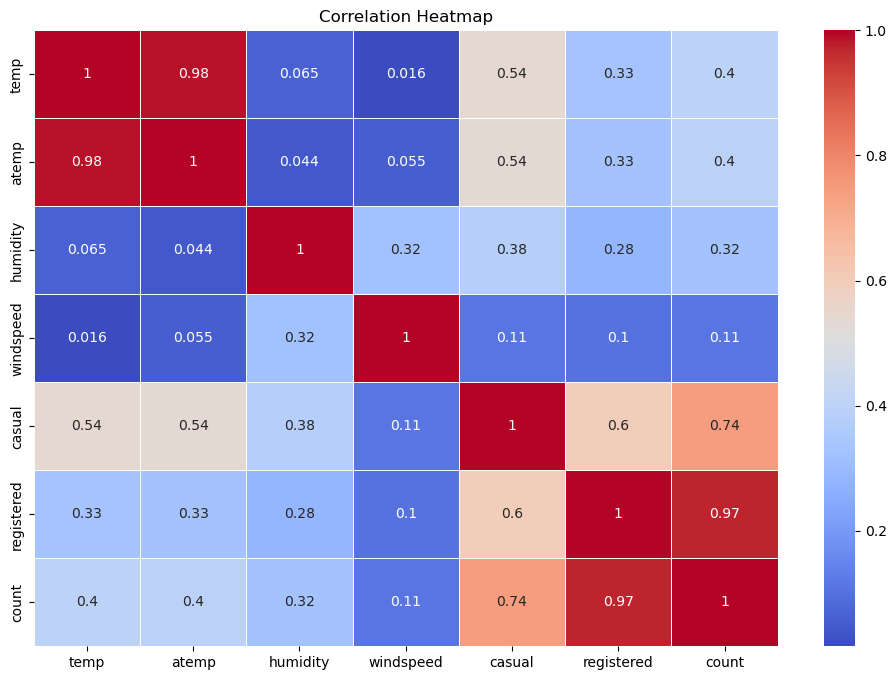

In [56]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white')
plt.title('Correlation Heatmap')
plt.show()

**Strong Correlations**
- `Registered and count (0.97)`: A very strong positive correlation, indicating registered users significantly contribute to the total count.
- `Casual and count (0.74)`: A strong positive correlation, showing casual users also significantly contribute to the total count.
- `Temp and atemp (0.98)`: A very strong positive correlation, as both measure temperature similarly.
- `Temp and count (0.40)` and `atemp and count (0.40)`: Moderate positive correlations, suggesting higher temperatures are associated with higher bike usage.

**Moderate Correlations**
- `Casual and temp/atemp (0.54)`: Moderate positive correlations, indicating casual users prefer warmer weather.
- `Registered and temp/atemp (0.33)`: Moderate positive correlations, weaker than for casual users.

**Negative Correlations**
- `Humidity and count (-0.32)`, `casual (-0.38)`, `registered (-0.28)`: Moderate negative correlations, with higher humidity reducing bike usage, especially for casual users.


In [57]:
df_clipped.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81.0,0.0,3.0,13.0,16.0,Saturday
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80.0,0.0,8.0,32.0,40.0,Saturday
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80.0,0.0,5.0,27.0,32.0,Saturday
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75.0,0.0,3.0,10.0,13.0,Saturday
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75.0,0.0,0.0,1.0,1.0,Saturday


In [58]:
# converting "df_clipped" data to "df" itself
df=df_clipped

In [59]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81.0,0.0,3.0,13.0,16.0,Saturday
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80.0,0.0,8.0,32.0,40.0,Saturday
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80.0,0.0,5.0,27.0,32.0,Saturday
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75.0,0.0,3.0,10.0,13.0,Saturday
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75.0,0.0,0.0,1.0,1.0,Saturday


- ii. Remove the highly correlated variables, if any.

### Identify highly correlated pairs (correlation > 0.8)

- Here, the columns **"temp" & "atemp"** are highly correlated with a value of 0.98
- "temp" typically represents the actual temperature."atemp" often represents the **"feels-like"** temperature, which considers factors such as humidity and wind to provide a perceived temperature.
- So, we are dropping **temp** column

In [60]:
df = df.drop(columns=['temp'])

# Print the features being dropped
print("Features being dropped due to high correlation: ['temp']")

Features being dropped due to high correlation: ['temp']


- And columns **"registered" & "count"** are highly correlated with a value of 0.97
- By keeping **"count"** and removing **"registered"**, you retain the total user count while reducing redundancy and simplifying your dataset.

In [61]:
df = df.drop(columns=['registered'])

# Print the features being dropped
print("Features being dropped due to high correlation: ['registered']")

Features being dropped due to high correlation: ['registered']


In [62]:
# UPDATED DATA FRAME
df.head()

,datetime,season,holiday,workingday,weather,atemp,humidity,windspeed,casual,count,day
0,2011-01-01 00:00:00,spring,0,0,1,14.395,81.0,0.0,3.0,16.0,Saturday
1,2011-01-01 01:00:00,spring,0,0,1,13.635,80.0,0.0,8.0,40.0,Saturday
2,2011-01-01 02:00:00,spring,0,0,1,13.635,80.0,0.0,5.0,32.0,Saturday
3,2011-01-01 03:00:00,spring,0,0,1,14.395,75.0,0.0,3.0,13.0,Saturday
4,2011-01-01 04:00:00,spring,0,0,1,14.395,75.0,0.0,0.0,1.0,Saturday


# 3. Check if there any significant difference between the no. of bike rides on Weekdays and Weekends?

In [63]:
df.groupby(by = 'workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,187.941278,172.12254,1.0,44.0,128.0,304.0,647.0
1,7412.0,189.062736,172.56440,1.0,41.0,151.0,277.0,647.0


[]

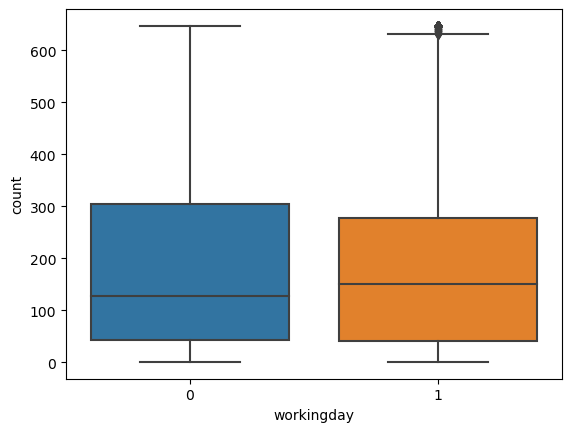

In [64]:
sns.boxplot(data = df, x = 'workingday', y = 'count')
plt.plot()

***STEP-1:*** Set up **Null Hypothesis** and **Alternative Hypothesis**

- Ho(Null Hypothesis): There is no significant diffenence b/w the no. of bike rides on Weekdays and Weekends
- Ha(Alternative Hypothesis): There is significant diffenence b/w the no. of bike rides on Weekdays and Weekends

***STEP-2:*** Checking for basic assumpitons for the hypothesis

• Distribution check using **QQ Plot**
• Homogeneity of **Variances** using **Levene's** test

***STEP-3:*** Define Test statistics; Distribution of T under H0.

- If the assumptions of T Test are met then we can proceed performing T Test for independent samples else we will perform the non parametric test equivalent to T Test for independent sample i.e., Mann-Whitney U rank test for two independent samples.

***STEP-4:*** Compute the p-value and fix value of alpha.

- We set our alpha to be **0.05**

***STEP-5:*** Compare p-value and alpha.

- Based on p-value, we will accept or reject H0.
    1. p-val > alpha : Accept H0
    2. p-val < alpha : Reject H0

***Visual Tests to know if the samples follow normal distribution***

[]

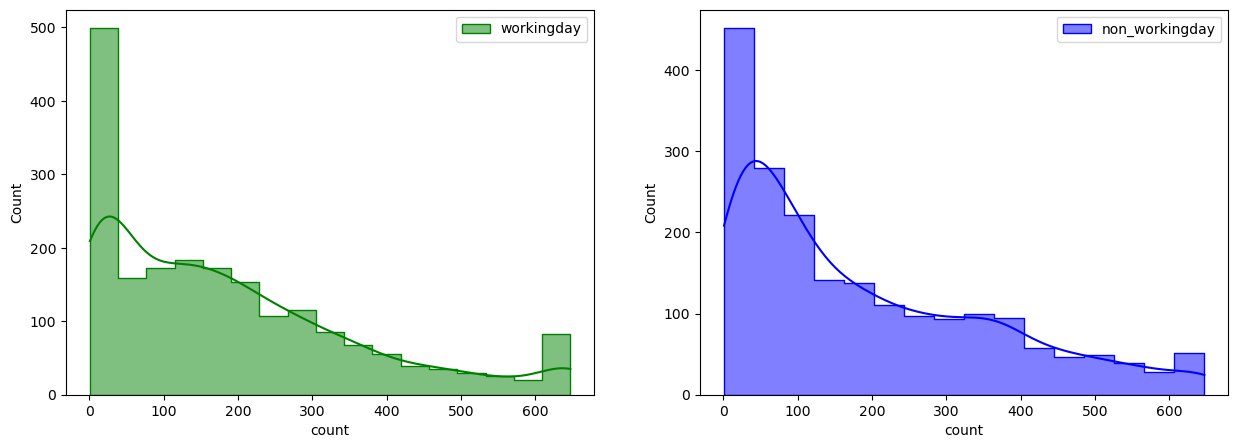

In [65]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df.loc[df['workingday'] == 1, 'count'].sample(2000),
 element = 'step', color = 'green', kde = True, label =
'workingday')
plt.legend()
plt.subplot(1, 2, 2)
sns.histplot(df.loc[df['workingday'] == 0, 'count'].sample(2000),
 element = 'step', color = 'blue', kde = True, label =
'non_workingday')
plt.legend()
plt.plot()

- It can be inferred from the above plot that the distributions do not follow normal distribution.

***Distribution check using QQ Plot***

[]

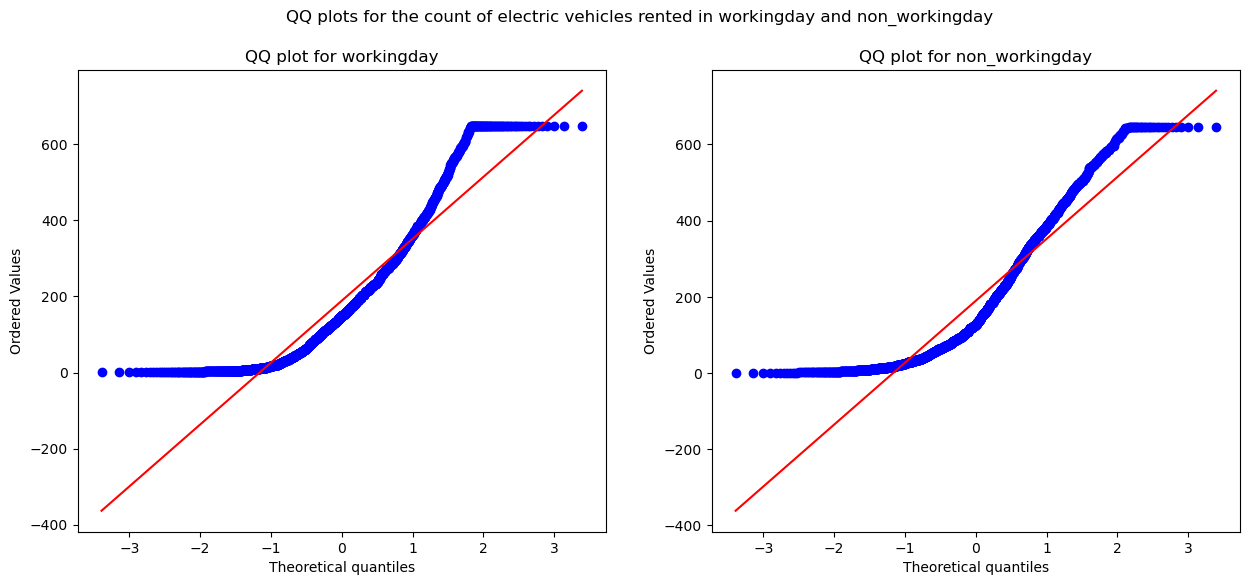

In [66]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in workingday and non_workingday')
spy.probplot(df.loc[df['workingday'] == 1, 'count'].sample(2000), plot = plt, dist = 'norm')
plt.title('QQ plot for workingday')
plt.subplot(1, 2, 2)
spy.probplot(df.loc[df['workingday'] == 0, 'count'].sample(2000), plot = plt, dist = 'norm')
plt.title('QQ plot for non_workingday')
plt.plot()

- It can be inferred from the above plot that the distributions do not follow normal distribution.

#### It can be seen from the above plots that the samples do not come from normal distribution.

- Applying Shapiro-Wilk test for normality

- Ho : The sample follows normal distribution 
- H1 : The sample does not follow normal distribution 

- alpha = 0.05

Test Statistics : **Shapiro-Wilk test for normality**

In [67]:
test_stat, p_value = spy.shapiro(df.loc[df['workingday'] == 1,'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
 print('The sample does not follow normal distribution')
else:
 print('The sample follows normal distribution') 


p-value 7.416734397328479e-36
The sample does not follow normal distribution


In [68]:
test_stat, p_value = spy.shapiro(df.loc[df['workingday'] == 0,'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
 print('The sample does not follow normal distribution')
else:
 print('The sample follows normal distribution') 

p-value 1.1274363155208207e-36
The sample does not follow normal distribution


#### Transforming the data using boxcox transformation and checking if the transformed data follows normal distribution.

In [69]:
transformed_workingday = spy.boxcox(df.loc[df['workingday'] == 1,'count'])[0]
test_stat, p_value = spy.shapiro(transformed_workingday)
print('p-value', p_value)
if p_value < 0.05:
 print('The sample does not follow normal distribution')
else:
 print('The sample follows normal distribution')


p-value 2.5876709269698424e-37
The sample does not follow normal distribution


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [70]:
transformed_non_workingday = spy.boxcox(df.loc[df['workingday'] == 1,'count'])[0]
test_stat, p_value = spy.shapiro(transformed_non_workingday)
print('p-value', p_value)
if p_value < 0.05:
 print('The sample does not follow normal distribution')
else:
 print('The sample follows normal distribution.')

p-value 2.5876709269698424e-37
The sample does not follow normal distribution


- Even after applying the boxcox transformation on each of the "workingday" and "non_workingday" data, the samples do not follow normal distribution.
- Homogeneity of Variances using **Lavene's** test

In [71]:
# Null Hypothesis(H0) - Homogenous Variance 

# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = spy.levene(df.loc[df['workingday'] == 1,'count'].sample(2000),df.loc[df['workingday'] == 0,'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
 print('The samples do not have Homogenous Variance')
else:
 print('The samples have Homogenous Variance ')


p-value 0.12285498247976549
The samples have Homogenous Variance 


***Since the samples are not normally distributed, T-Test cannot be applied here, we can perform its 
non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.***

In [72]:
# Ho : Mean no.of electric cycles rented is same for working and non-working days
# Ha : Mean no.of electric cycles rented is not same for working and non-working days
# Assuming significance Level to be 0.05
# Test statistics : Mann-Whitney U rank test for two independent samples

In [73]:
test_stat, p_value = spy.mannwhitneyu(df.loc[df['workingday'] == 1,'count'],df.loc[df['workingday'] == 0,'count'])
print('P-value :',p_value)
if p_value < 0.05:
 print('Mean no.of electric cycles rented is not same for working and non-working days')
else:
 print('Mean no.of electric cycles rented is same for working and non-working days')

P-value : 0.9467211269367186
Mean no.of electric cycles rented is same for working and non-working days


#### Therefore, the mean hourly count of the total rental bikes is statistically same for both working and non- working days .

**Conclusion:** We **Failed to rejec to Null hypothesis**. i.e,. there is no significant difference between the number of bike rides on weekdays and weekends.

# 4. Check if the demand of bicycles on rent is the same for different Weather conditions?

In [74]:
df.groupby(by = 'weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,201.837736,178.167934,1.0,48.0,161.0,305.0,647.0
2,2834.0,176.977417,161.940652,1.0,41.0,134.0,264.0,647.0
3,859.0,117.469150,132.347260,1.0,23.0,71.0,161.0,647.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


In [75]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

[]

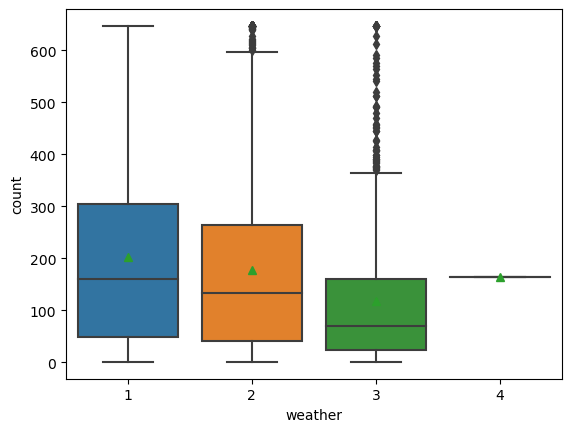

In [76]:
sns.boxplot(data = df, x = 'weather', y = 'count', showmeans = True)
plt.plot()

[]

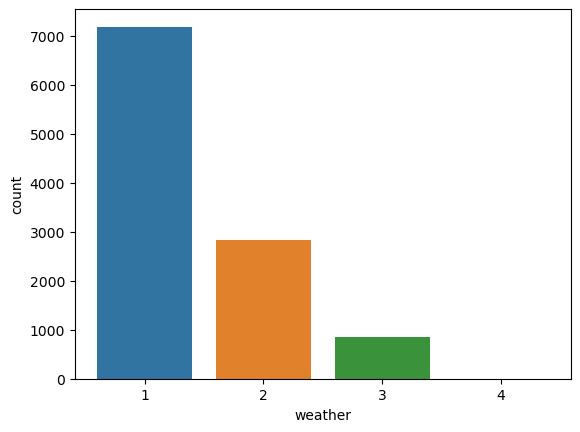

In [77]:
sns.countplot(data = df, x = 'weather')
plt.plot()

In [78]:
df_weather1 = df.loc[df['weather'] == 1]
df_weather2 = df.loc[df['weather'] == 2]
df_weather3 = df.loc[df['weather'] == 3]
df_weather4 = df.loc[df['weather'] == 4]
len(df_weather1), len(df_weather2), len(df_weather3), len(df_weather4)

(7192, 2834, 859, 1)

**STEP-1:** Formulating **Null Hypothesis** and **Alternative Hypothesis**

- **Null Hypothesis ( H0 ):**  Mean of cycle rented per hour is same for weather 1, 2 and 3. (We wont 
be considering weather 4 as there in only 1 data point for weather 4 and we cannot perform a 
ANOVA test with a single data point for a group)
- **Alternate Hypothesis ( HA ):** Mean of cycle rented per hour is not same for season 1,2,3 and 4 
are different.

**STEP-2:** Checking for **basic assumpitons** for the hypothesis.

Normality check using **QQ Plot**. If the distribution is not normal, use **BOX-COX transform** to transform it to normal distribution.

Homogeneity of Variances using **Levene's test**

Each observations are **independent**.


**STEP-3:** Define **Test statistics**.

The test statistic for a One-Way ANOVA is denoted as F. For an independent variable with k groups, the F statistic evaluates whether the group means are significantly different.

**F=MSB / MSW**

Under H0, the test statistic should follow **F-Distribution**.

**STEP-4:** Decide the kind of test.

We will be performing right tailed f-test

***STEP-5:*** Compute the p-value and fix value of alpha.

we will be computing the anova-test p-value using the f_oneway function using scipy.stats. We set 
our **alpha to be 0.05**

***STEP-6:*** Compare p-value and alpha.

Based on p-value, we will accept or reject H0.


- **p-val > alpha** : Accept H0
- **p-val < alpha** : Reject H0

***Visual Tests to know if the samples follow normal distribution***

[]

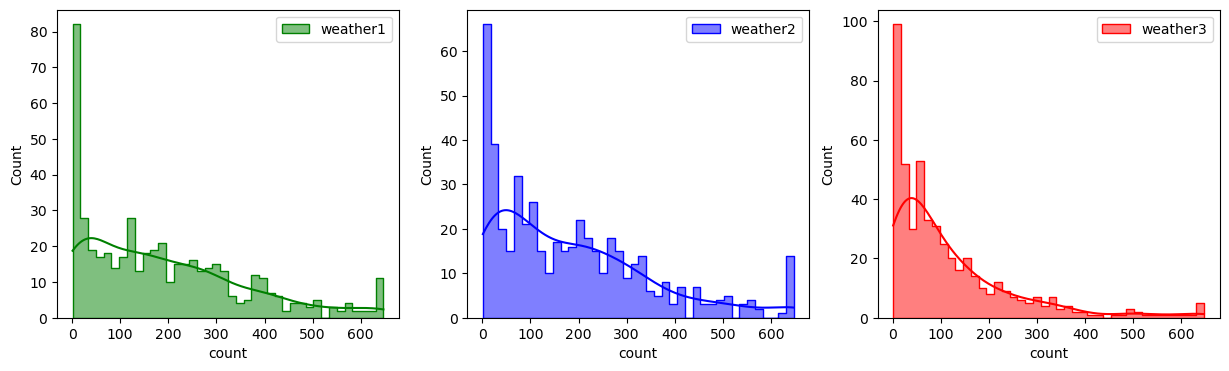

In [79]:
plt.figure(figsize = (15, 4))
plt.subplot(1, 3, 1)
sns.histplot(df_weather1.loc[:, 'count'].sample(500), bins = 40,element = 'step', color = 'green', kde = True, label ='weather1')
plt.legend()
plt.subplot(1, 3, 2)
sns.histplot(df_weather2.loc[:, 'count'].sample(500), bins = 40,element = 'step', color = 'blue', kde = True, label ='weather2')
plt.legend()
plt.subplot(1, 3, 3)
sns.histplot(df_weather3.loc[:, 'count'].sample(500), bins = 40,element = 'step', color = 'red', kde = True, label ='weather3')
plt.legend()
plt.plot()

• It can be inferred from the above plot that the distributions do not follow normal distribution.

***Distribution check using QQ Plot***

[]

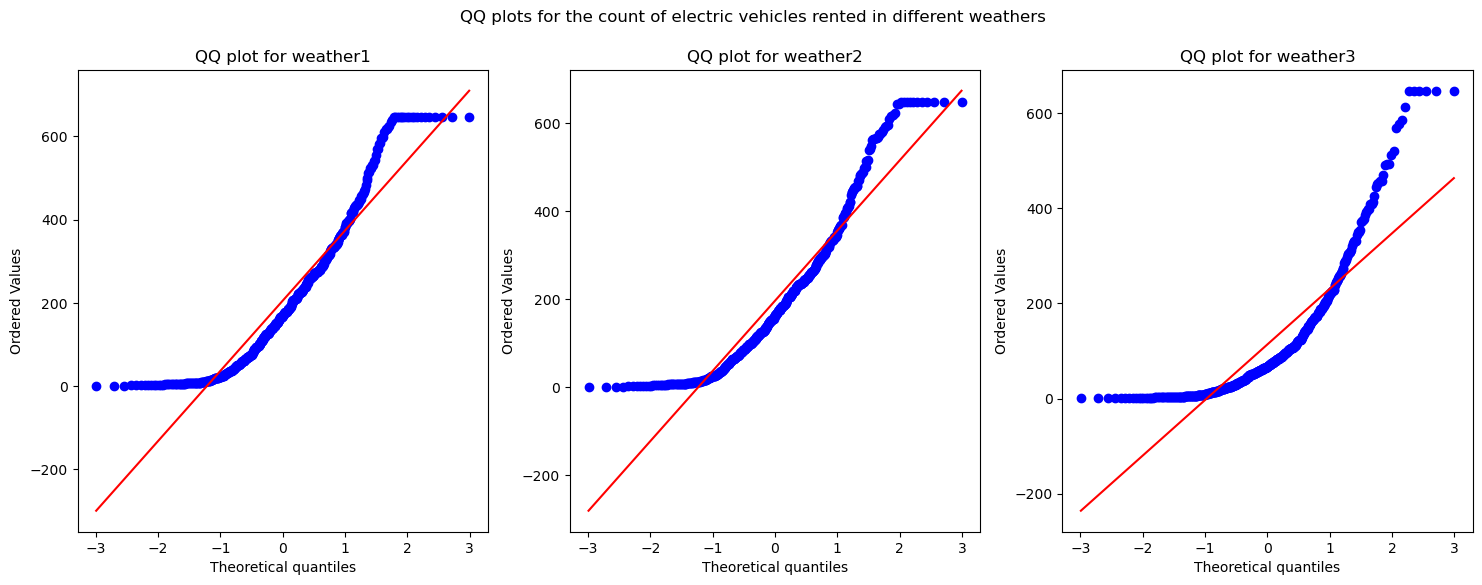

In [80]:
plt.figure(figsize = (18, 6))
plt.subplot(1, 3, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in different weathers')
spy.probplot(df_weather1.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather1')
plt.subplot(1, 3, 2)
spy.probplot(df_weather2.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather2')
plt.subplot(1, 3, 3)
spy.probplot(df_weather3.loc[:, 'count'].sample(500), plot = plt, dist ='norm')
plt.title('QQ plot for weather3')
plt.plot()

• It can be inferred from the above plot that the distributions do not follow normal distribution.

#### It can be seen from the above plots that the samples do not come from normal distribution.

• Applying Shapiro-Wilk test for normality.

H0 : The sample follows normal distribution.
H1 : The sample does not follow normal distribution.

In [81]:
alpha = 0.05

Test Statistics : **Shapiro-Wilk test for normality**

In [82]:
test_stat, p_value = spy.shapiro(df_weather1.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
 print('The sample does not follow normal distribution')
else:
 print('The sample follows normal distribution') 

p-value 2.1600938681518417e-18
The sample does not follow normal distribution


In [83]:
test_stat, p_value = spy.shapiro(df_weather2.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
 print('The sample does not follow normal distribution')
else:
 print('The sample follows normal distribution') 

p-value 1.202245111046855e-19
The sample does not follow normal distribution


In [84]:
test_stat, p_value = spy.shapiro(df_weather3.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
 print('The sample does not follow normal distribution')
else:
 print('The sample follows normal distribution')

p-value 1.8086398863276799e-25
The sample does not follow normal distribution


***Transforming the data using boxcox transformation and checking if the transformed data follows 
normal distribution.***

In [85]:
transformed_weather1 = spy.boxcox(df_weather1.loc[:,
'count'].sample(5000))[0]
test_stat, p_value = spy.shapiro(transformed_weather1)
print('p-value', p_value)
if p_value < 0.05:
 print('The sample does not follow normal distribution')
else:
 print('The sample follows normal distribution')

p-value 1.0266787643485823e-31
The sample does not follow normal distribution


In [86]:
transformed_weather2 = spy.boxcox(df_weather2.loc[:, 'count'])[0]
test_stat, p_value = spy.shapiro(transformed_weather2)
print('p-value', p_value)
if p_value < 0.05:
 print('The sample does not follow normal distribution')
else:
 print('The sample follows normal distribution')

p-value 1.3800435164745187e-21
The sample does not follow normal distribution


In [87]:
transformed_weather3 = spy.boxcox(df_weather3.loc[:, 'count'])[0]
test_stat, p_value = spy.shapiro(transformed_weather3)
print('p-value', p_value)
if p_value < 0.05:
 print('The sample does not follow normal distribution')
else:
 print('The sample follows normal distribution')

p-value 1.9066690981617285e-07
The sample does not follow normal distribution


• Even after applying the boxcox transformation on each of the weather data, the samples do not 
follow normal distribution.

***Homogeneity of Variances using Levene's test***

In [88]:
# Null Hypothesis(H0) - Homogenous Variance 

# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = spy.levene(df_weather1.loc[:, 'count'].sample(500),
 df_weather2.loc[:, 'count'].sample(500),
 df_weather3.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
 print('The samples do not have Homogenous Variance')
else:
 print('The samples have Homogenous Variance ')


p-value 5.731453986553992e-10
The samples do not have Homogenous Variance


***Since the samples are not normally distributed and do not have the same variance, f_oneway test 
cannot be performed here, we can perform its non parametric equivalent test i.e., Kruskal-Wallis 
H-test for independent samples.***

In [89]:
# Ho : Mean no. of cycles rented is same for different weather

# Ha : Mean no. of cycles rented is different for different weather

# Assuming significance Level to be 0.05

alpha = 0.05
test_stat, p_value = spy.kruskal(df_weather1, df_weather2, df_weather3) 

print('Test Statistic =', test_stat)

print('p value =', p_value)


Test Statistic = [1.36471292e+01 3.87838808e+01 5.37649760e+00 1.56915686e+01
 1.08840000e+04 4.14298489e+01 1.83168690e+03 2.80336675e+01
 2.84381466e+02 2.05002036e+02 7.08445555e+01]
p value = [1.08783632e-03 3.78605818e-09 6.79999165e-02 3.91398508e-04
 0.00000000e+00 1.00837627e-09 0.00000000e+00 8.17648151e-07
 1.76745861e-62 3.05051748e-45 4.13333147e-16]


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


In [90]:
p_value = np.mean(p_value)
p_value

0.006316361250428895

***Comparing p value with significance level***

In [91]:
if p_value < alpha:
 print('Reject Null Hypothesis')
else:
 print('Failed to reject Null Hypothesis')


Reject Null Hypothesis


***Therefore, the average number of rental bikes is statistically different for different weathers.***

**Conclusion:** Mean of cycle rented per hour is not same for season 1,2,3 and 4 are different.

# 5. Check if the demand of bicycles on rent is the same for different Seasons?

In [92]:
df.groupby(by = 'season')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
fall,2733.0,229.171606,183.228080,1.0,68.0,195.0,347.0,647.0
spring,2686.0,115.977290,123.576298,1.0,24.0,78.0,164.0,647.0
summer,2733.0,212.168313,183.809026,1.0,49.0,172.0,321.0,647.0
winter,2734.0,196.248720,169.170146,1.0,51.0,161.0,294.0,647.0


In [93]:
df_season_spring = df.loc[df['season'] == 'spring', 'count']
df_season_summer = df.loc[df['season'] == 'summer', 'count']
df_season_fall = df.loc[df['season'] == 'fall', 'count']
df_season_winter = df.loc[df['season'] == 'winter', 'count']
len(df_season_spring), len(df_season_summer), len(df_season_fall),len(df_season_winter)

(2686, 2733, 2733, 2734)

In [94]:
# or we can do
df['season'].value_counts()

winter    2734
fall      2733
summer    2733
spring    2686
Name: season, dtype: int64

[]

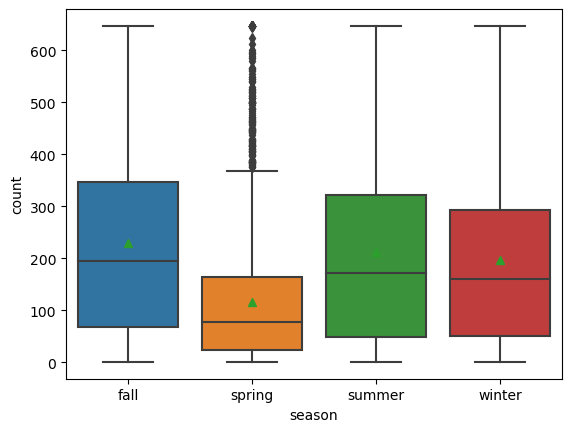

In [95]:
sns.boxplot(data = df, x = 'season', y = 'count', showmeans = True)
plt.plot()

[]

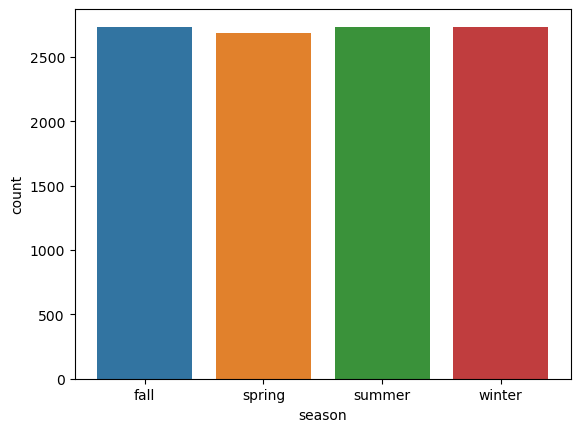

In [96]:
sns.countplot(data = df, x = 'season')
plt.plot()

***STEP-1:*** Set up **Null Hypothesis** and **Alternative Hypothesis**

• **Null Hypothesis ( H0 ):** Mean of cycle rented per hour is same for season 1,2,3 and 4.

• **Alternate Hypothesis ( HA ):** Mean of cycle rented per hour is different for season 1,2,3 and 4.

***STEP-2:*** Checking for **basic assumpitons** for the hypothesis

1. Normality check using **QQ Plot**. If the distribution is not normal, use BOX-COX transform to 
transform it to normal distribution.

2. Homogeneity of Variances using **Levene's test**.

3. Each observations are **independent**.

***STEP-3:*** Define Test statistics

The test statistic for a One-Way ANOVA is denoted as F. For an independent variable with k groups, the F statistic evaluates whether the group means are significantly different.

**F=MSB / MSW**

Under H0, the test statistic should follow **F-Distribution**.

**STEP-4:** Decide the kind of test.

We will be performing right tailed f-test

***STEP-5:*** Compute the p-value and fix value of alpha.

we will be computing the anova-test p-value using the **f_oneway function** using scipy.stats. We set our **alpha to be 0.05**

***STEP-6:*** Compare p-value and alpha.

Based on p-value, we will accept or reject H0. p-val > alpha : Accept H0 p-val < alpha : Reject H0

The one-way ANOVA compares the means between the groups you are interested in and determines 
whether any of those means are statistically significantly different from each other.

Specifically, it tests the null hypothesis (H0):

***µ1 = µ2 = µ3 = ..... = µk***

where, µ = group mean and k = number of groups.

If, however, the one-way ANOVA returns a statistically significant result, we accept the alternative 
hypothesis (HA), which is that there are at least two group means that are statistically significantly 
different from each other.

***Visual Tests to know if the samples follow normal distribution***

[]

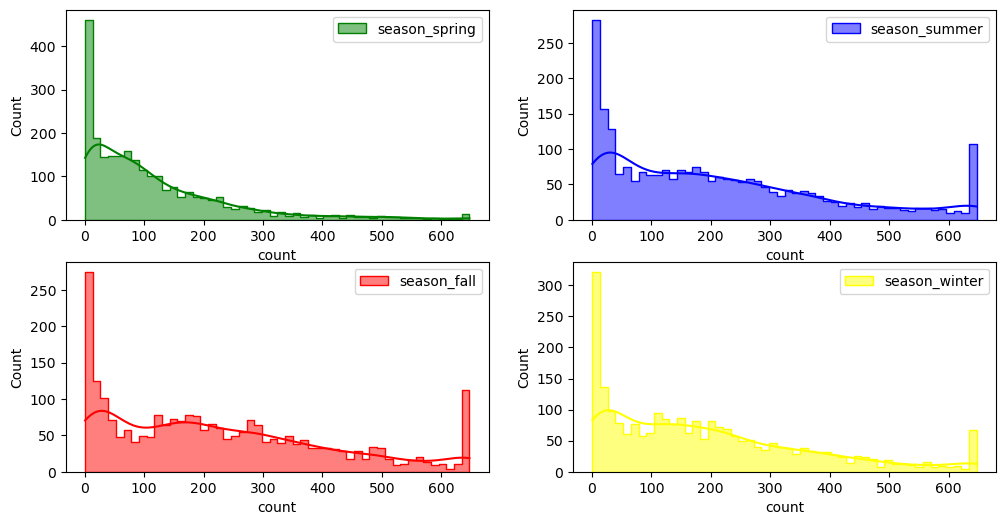

In [97]:
plt.figure(figsize = (12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df_season_spring.sample(2500), bins = 50,
 element = 'step', color = 'green', kde = True, label =
'season_spring')
plt.legend()
plt.subplot(2, 2, 2)
sns.histplot(df_season_summer.sample(2500), bins = 50,
 element = 'step', color = 'blue', kde = True, label =
'season_summer')
plt.legend()
plt.subplot(2, 2, 3)
sns.histplot(df_season_fall.sample(2500), bins = 50,
 element = 'step', color = 'red', kde = True, label =
'season_fall')
plt.legend()
plt.subplot(2, 2, 4)
sns.histplot(df_season_winter.sample(2500), bins = 50,
 element = 'step', color = 'yellow', kde = True, label =
'season_winter')
plt.legend()
plt.plot()

    • It can be inferred from the above plot that the distributions do not follow normal distribution.

***Distribution check using QQ Plot***

[]

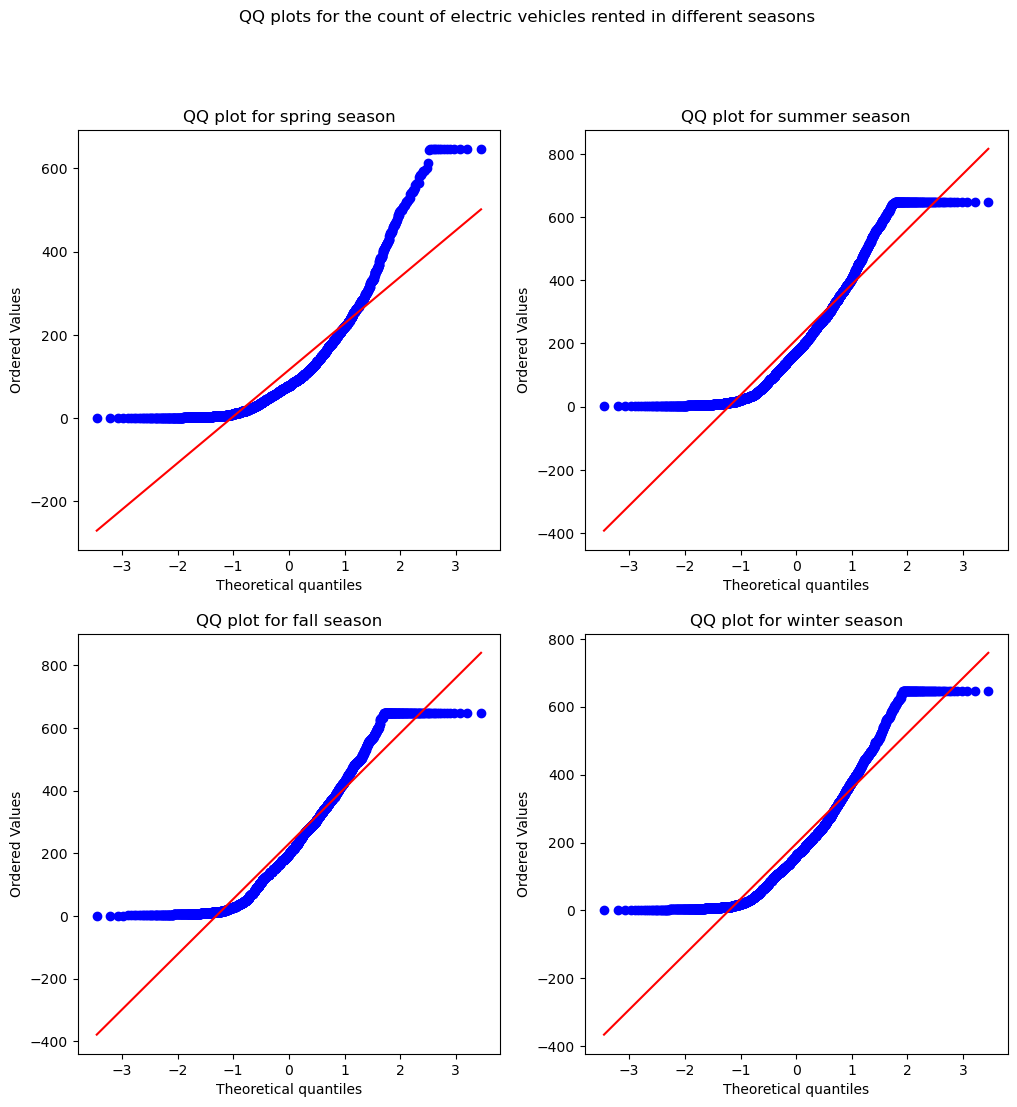

In [98]:
plt.figure(figsize = (12, 12))
plt.subplot(2, 2, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in different seasons')
spy.probplot(df_season_spring.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for spring season')
plt.subplot(2, 2, 2)
spy.probplot(df_season_summer.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for summer season')
plt.subplot(2, 2, 3)
spy.probplot(df_season_fall.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for fall season')
plt.subplot(2, 2, 4)
spy.probplot(df_season_winter.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for winter season')
plt.plot()

    • It can be inferred from the above plots that the distributions do not follow normal distribution.
    
#### It can be seen from the above plots that the samples do not come from normal distribution.
    
    • Applying Shapiro-Wilk test for normality.

H0 : The sample follows normal distribution H1 : The sample does not follow normal distribution

alpha = 0.05

Test Statistics : **Shapiro-Wilk test for normality**

In [99]:
test_stat, p_value = spy.shapiro(df_season_spring.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
 print('The sample does not follow normal distribution')
else:
 print('The sample follows normal distribution') 

p-value 0.0
The sample does not follow normal distribution


In [100]:
test_stat, p_value = spy.shapiro(df_season_summer.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
 print('The sample does not follow normal distribution')
else:
 print('The sample follows normal distribution') 

p-value 3.746002398408834e-37
The sample does not follow normal distribution


In [101]:
test_stat, p_value = spy.shapiro(df_season_fall.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
 print('The sample does not follow normal distribution')
else:
 print('The sample follows normal distribution')

p-value 6.868522776095054e-34
The sample does not follow normal distribution


In [102]:
test_stat, p_value = spy.shapiro(df_season_winter.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
 print('The sample does not follow normal distribution')
else:
 print('The sample follows normal distribution')


p-value 1.226159563573763e-36
The sample does not follow normal distribution


***Transforming the data using boxcox transformation and checking if the transformed data follows 
normal distribution.***

In [103]:
transformed_df_season_spring = spy.boxcox(df_season_spring.sample(2500))[0]
test_stat, p_value = spy.shapiro(transformed_df_season_spring)
print('p-value', p_value)
if p_value < 0.05:
 print('The sample does not follow normal distribution')
else:
 print('The sample follows normal distribution')


p-value 2.8568128366229553e-17
The sample does not follow normal distribution


In [104]:
transformed_df_season_summer = spy.boxcox(df_season_summer.sample(2500))[0]
test_stat, p_value = spy.shapiro(transformed_df_season_summer)
print('p-value', p_value)
if p_value < 0.05:
 print('The sample does not follow normal distribution')
else:
 print('The sample follows normal distribution')

p-value 6.670958857651699e-24
The sample does not follow normal distribution


In [105]:
transformed_df_season_fall = spy.boxcox(df_season_fall.sample(2500))[0]
test_stat, p_value = spy.shapiro(transformed_df_season_fall)
print('p-value', p_value)
if p_value < 0.05:
 print('The sample does not follow normal distribution')
else:
 print('The sample follows normal distribution')


p-value 4.193532310119928e-25
The sample does not follow normal distribution


In [106]:
transformed_df_season_fall = spy.boxcox(df_season_fall.sample(2500))[0]
test_stat, p_value = spy.shapiro(transformed_df_season_fall)
print('p-value', p_value)
if p_value < 0.05:
 print('The sample does not follow normal distribution')
else:
 print('The sample follows normal distribution')


p-value 7.123697964071616e-25
The sample does not follow normal distribution


    • Even after applying the boxcox transformation on each of the season data, the samples do not follow normal distribution.

***Homogeneity of Variances using Levene's test***

In [107]:
# Null Hypothesis(H0) - Homogenous Variance 

# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = spy.levene(df_season_spring.sample(2500),
 df_season_summer.sample(2500),
 df_season_fall.sample(2500),
 df_season_winter.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
 print('The samples do not have Homogenous Variance')
else:
 print('The samples have Homogenous Variance ')


p-value 1.7588334349243868e-118
The samples do not have Homogenous Variance


#### Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform its non parametric equivalent test i.e., Kruskal-Wallis H-test for independent samples.


In [108]:
# Ho : Mean no. of cycles rented is same for different weather

# Ha : Mean no. of cycles rented is different for different weather

# Assuming significance Level to be 0.05

alpha = 0.05
test_stat, p_value = spy.kruskal(df_season_spring, df_season_summer,
df_season_fall,df_season_winter) 
print('Test Statistic =', test_stat)
print('p value =', p_value)


Test Statistic = 699.2817665514561
p value = 3.0045514163996123e-151


***Comparing p value with significance level.***

In [109]:
if p_value < alpha:
 print('Reject Null Hypothesis')
else:
 print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


#### Therefore, the average number of rental bikes is statistically different for different seasons.

**Conclusion:** Mean of cycle rented per hour is different for season 1,2,3 and 4.

# 6. Check if the Weather conditions are significantly different during different Seasons?

In [110]:
df[['weather', 'season']].describe()

,weather,season
count,10886,10886
unique,4,4
top,1,winter
freq,7192,2734


    • It is clear from the above statistical description that both 'weather' and 'season' features are categorical in nature.

***STEP-1:*** Set up **Null Hypothesis** and **Alternative Hypothesis**

    1. Null Hypothesis ( H0 ): weather is independent of season
    2. Alternate Hypothesis ( HA ): weather is dependent of seasons.

***STEP-2:*** Define Test statistics

Since we have two categorical features, the Chi- square test is applicable here. Under H0, the test statistic 
should follow **Chi-Square Distribution.**

***STEP-3:*** Checking for **basic assumptons** for the hypothesis (Non-Parametric Test)

1. The data in the cells should be frequencies, or counts of cases.
2. The levels (or categories) of the variables are mutually exclusive. That is, a particular subject fits into one and only one level of each of the variables.
3. There are 2 variables, and both are measured as categories.
4. The value of the cell expecteds should be 5 or more in at least 80% of the cells, and no cell should have an expected of less than one (3).

***STEP-4:*** Compute the p-value and fix value of alpha.

we will be computing the chi square-test p-value using the chi2_contingency function using scipy.stats. 
We set our ***alpha to be 0.05***

***STEP-5:*** Compare p-value and alpha.

Based on p-value, we will accept or reject H0.
     1. **p-val > alpha** : Accept H0
     2. **p-val < alpha** : Reject H0
     
The **Chi-square statistic is a non-parametric** (distribution free) tool designed to analyze group 
differences when the dependent variable is measured at a nominal level. Like all non-parametric 
statistics, the Chi-square is robust with respect to the distribution of the data. Specifically, it does not
require equality of variances among the study groups or homoscedasticity in the data.


In [111]:
# First, finding the contingency table such that each value is the total number of total bikes rented 
 # for a particular season and weather 
cross_table = pd.crosstab(index = df['season'],
 columns = df['weather'],
 values = df['count'],
 aggfunc = np.sum).replace(np.nan, 0)
cross_table

weather,1,2,3,4
season,,,,
fall,458891.0,136964.0,30471.0,0.0
spring,222091.0,76341.0,12919.0,164.0
summer,419164.0,133072.0,27620.0,0.0
winter,351471.0,155177.0,29896.0,0.0


Since the above contingency table has one column in which the count of the rented electric vehicle is less than 5 in most of the cells, we can remove the weather 4 and then proceed further.

In [112]:
cross_table = pd.crosstab(index = df['season'],
 columns = df.loc[df['weather'] != 4, 'weather'],
 values = df['count'],
 aggfunc = np.sum).to_numpy()[:, :3]
cross_table

array([[458891., 136964.,  30471.],
       [222091.,  76341.,  12919.],
       [419164., 133072.,  27620.],
       [351471., 155177.,  29896.]])

In [113]:
chi_test_stat, p_value, dof, expected = spy.chi2_contingency(observed = cross_table)
print('Test Statistic =', chi_test_stat)
print('p value =', p_value)
print('-' * 65)
print("Expected : '\n'", expected)

Test Statistic = 10367.871457210327
p value = 0.0
-----------------------------------------------------------------
Expected : '
' [[442624.82328657 152933.07437063  30768.1023428 ]
 [220031.87055159  76024.09230715  15295.03714126]
 [409784.45654764 141586.26780982  28485.27564254]
 [379175.84961421 131010.56551239  26357.5848734 ]]


*Comparing p value with significance level*

In [114]:
if p_value < alpha:
 print('Reject Null Hypothesis')
else:
 print('Failed to reject Null Hypothesis')


Reject Null Hypothesis


#### Therefore, there is statistically significant dependency of weather and season based on the number of number of bikes rented.

**Conclusion:**  We reject the Null Hypothesis i.e,. there is statistically significant dependency of weather and season based on the number of number of bikes rented.

[]

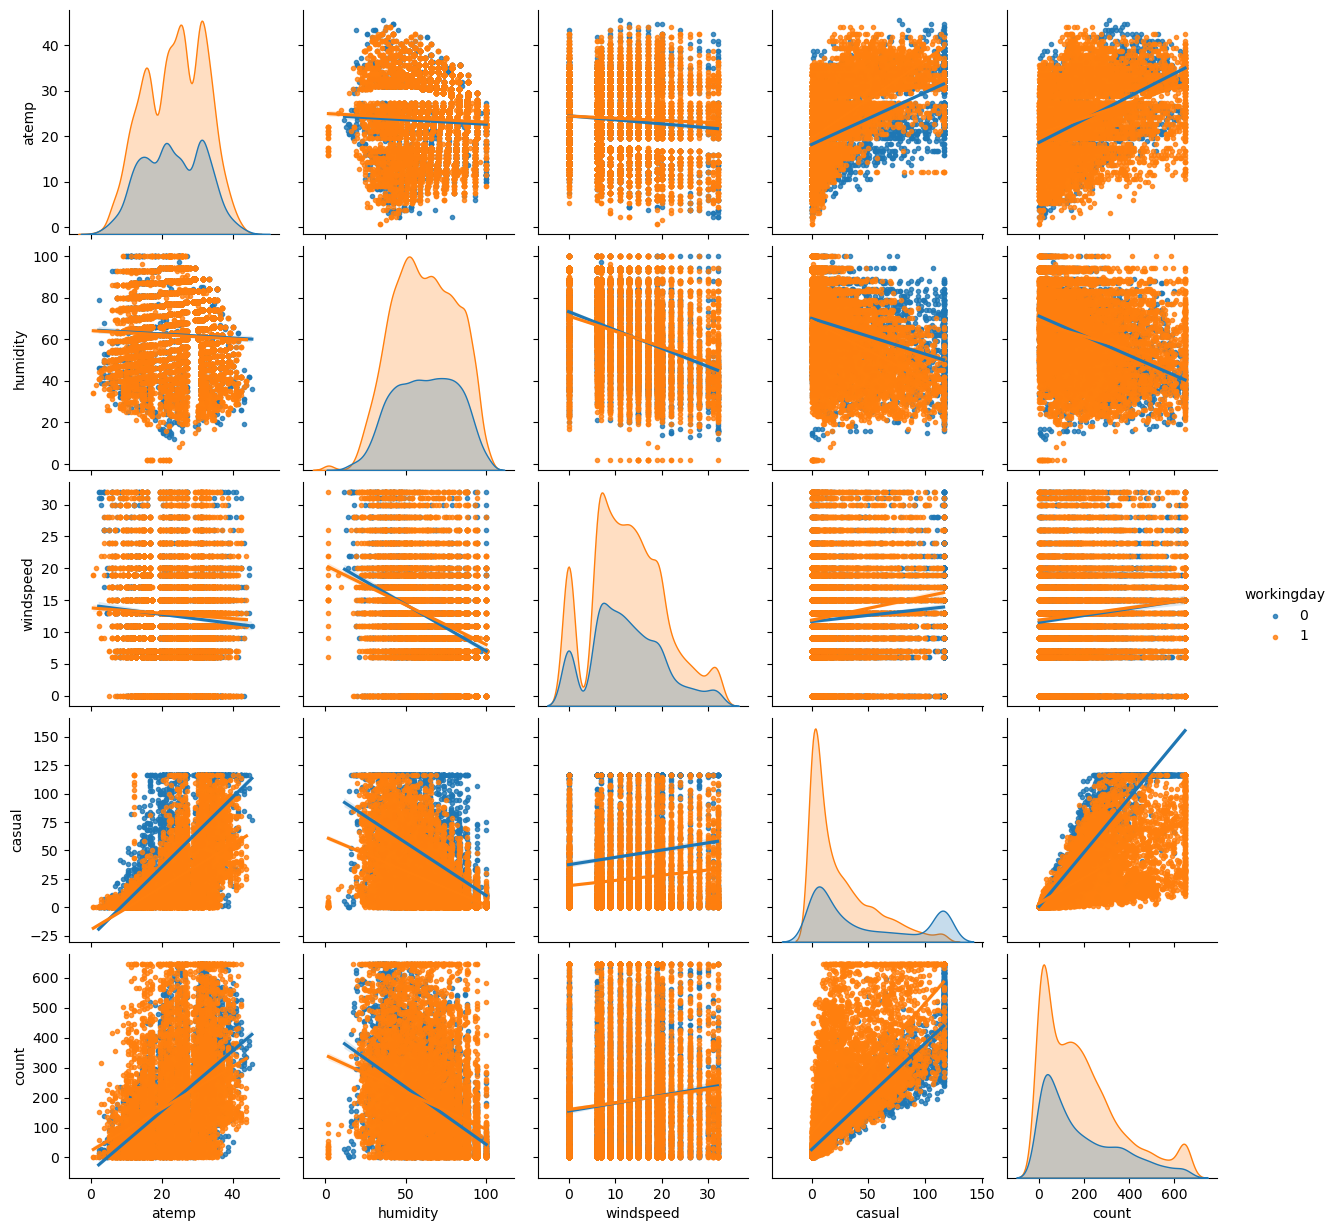

In [115]:
sns.pairplot(data = df,
 kind = 'reg',
 hue = 'workingday',
 markers = '.')
plt.plot()

# Insights:

• The data is given from Timestamp('2011-01-01 00:00:00') to Timestamp('2012-12-19 23:00:00'). The total time period for which the data is given is '718 days 23:00:00'.

• Out of every 100 users, around 19 are casual users and 81 are registered users.

• The mean total hourly count of rental bikes is 144 for the year 2011 and 239 for the year 2012. 
An annual growth rate of 65.41 % can be seen in the demand of electric vehicles on an hourly basis.

• There is a seasonal pattern in the count of rental bikes, with higher demand during the spring and summer months, a slight decline in the fall, and a further decrease in the winter months.

• The average hourly count of rental bikes is the lowest in the month of January followed by February and March.

• There is a distinct fluctuation in count throughout the day, with low counts during early morning 
hours, a sudden increase in the morning, a peak count in the afternoon, and a gradual decline in the evening and nighttime.

• More than 80 % of the time, the temperature is less than 28 degrees celcius.

• More than 80 % of the time, the humidity value is greater than 40. Thus for most of the time, humidity level varies from optimum to too moist.

• More than 85 % of the total, windspeed data has a value of less than 20.

• The hourly count of total rental bikes is the highest in the clear and cloudy weather, followed by 
the misty weather and rainy weather. There are very few records for extreme weather conditions.

• The mean hourly count of the total rental bikes is statistically similar for both working and non-working days.

• There is statistically significant dependency of weather and season based on the hourly total 
number of bikes rented.

• The hourly total number of rental bikes is statistically different for different weathers.

• There is no statistically significant dependency of weather 1, 2, 3 on season based on the average 
hourly total number of bikes rented.

• The hourly total number of rental bikes is statistically different for different seasons.

# Recommendations:

• **Seasonal Marketing:** Since there is a clear seasonal pattern in the count of rental bikes, Yulu can adjust its marketing strategies accordingly. Focus on promoting bike rentals during the spring and summer months when there is higher demand. Offer seasonal discounts or special packages to attract more customers during these periods.

• **Time-based Pricing:** Take advantage of the hourly fluctuation in bike rental counts throughout the day. Consider implementing time-based pricing where rental rates are lower during off-peak hours and higher during peak hours. This can encourage customers to rent bikes during less busy times, balancing out the demand and optimizing the resources.

• **Weather-based Promotions:** Recognize the impact of weather on bike rentals. Create weatherbased promotions that target customers during clear and cloudy weather, as these conditions show the highest rental counts. Yulu can offer weather-specific discounts to attract more customers during these favorable weather conditions.

• **User Segmentation:** Given that around 81% of users are registered, and the remaining 19% are casual, Yulu can tailor its marketing and communication strategies accordingly. Provide loyalty programs, exclusive offers, or personalized recommendations for registered users to encourage repeat business. For casual users, focus on providing a seamless rental experience and promoting the benefits of bike rentals for occasional use.

• **Optimize Inventory:** Analyze the demand patterns during different months and adjust the inventory accordingly. During months with lower rental counts such as January, February, and March, Yulu can optimize its inventory levels to avoid excess bikes. On the other hand, duringpeak months, ensure having sufficient bikes available to meet the higher demand.

• **Improve Weather Data Collection:** Given the lack of records for extreme weather conditions, consider improving the data collection process for such scenarios. Having more data on extreme weather conditions can help to understand customer behavior and adjust the operations accordingly, such as offering specialized bike models for different weather conditions or implementing safety measures during extreme weather.

• **Customer Comfort:** Since humidity levels are generally high and temperature is often below 28 degrees Celsius, consider providing amenities like umbrellas, rain jackets, or water bottles to enhance the comfort and convenience of the customers. These small touches can contribute to a positive customer experience and encourage repeat business.

• **Collaborations with Weather Services:** Consider collaborating with weather services to provide real-time weather updates and forecasts to potential customers. Incorporate weather information into your marketing campaigns or rental app to showcase the ideal biking conditions and attract users who prefer certain weather conditions.

• **Seasonal Bike Maintenance:** Allocate resources for seasonal bike maintenance. Before the peak seasons, conduct thorough maintenance checks on the bike fleet to ensure they are in top condition. Regularly inspect and service bikes throughout the year to prevent breakdowns and maximize customer satisfaction.

• **Customer Feedback and Reviews:** Encourage customers to provide feedback and reviews on their biking experience. Collecting feedback can help identify areas for improvement, understand customer preferences, and tailor the services to better meet customer expectations.

• **Social Media Marketing:** Leverage social media platforms to promote the electric bike rental 
services. Share captivating visuals of biking experiences in different weather conditions, highlight 
customer testimonials, and engage with potential customers through interactive posts and contests. Utilize targeted advertising campaigns to reach specific customer segments and drive more bookings.

• **Special Occasion Discounts:** Since Yulu focusses on providing a sustainable solution for vehicular pollution, it should give special discounts on the occassions like Zero Emissions Day (21st September), Earth day (22nd April), World Environment Day (5th June) etc in order to attract new users.